In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Exploration

In [2]:
data_root=Path("../data/Hebrew-Sentiment-Data/Sentiment_Data")
token_folder=data_root/"token"
morph_folder=data_root/"morph"
train_path=token_folder/"train.tsv"
test_path=token_folder/"test_gold.tsv"
train_df=pd.read_csv(train_path, encoding="utf-8", sep="\t")
train_df.loc[:, "label"]=train_df.label.astype("category")
test_df=pd.read_csv(test_path, encoding="utf-8", sep="\t")
test_df.loc[:, "label"]=test_df.label.astype("category")
text=train_df["comment"]
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5926 entries, 0 to 5925
Data columns (total 2 columns):
comment    5926 non-null object
label      5926 non-null category
dtypes: category(1), object(1)
memory usage: 52.3+ KB
None


0    4017
1    1744
2     165
Name: label, dtype: int64
0    0.677860
1    0.294296
2    0.027843
Name: label, dtype: float64


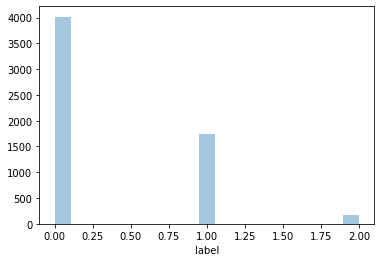

In [3]:
tot=len(train_df)
print(train_df.label.value_counts())
print(train_df.label.value_counts()/tot)
sns.distplot(train_df.label, kde=False)

In [4]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist(range=(0,2000))

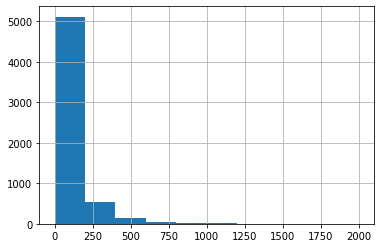

In [5]:
plot_character_length_histogram(train_df.comment)

In [6]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(range=(0,300))

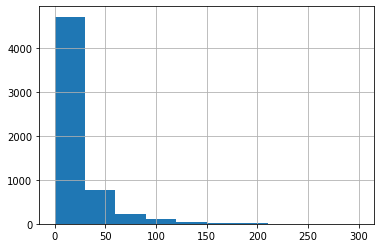

In [7]:
plot_word_number_histogram(train_df.comment)

tot=len(test_df)
print(test_df.label.value_counts())
print(test_df.label.value_counts()/tot)

In [8]:
def get_hebrew_stopwords():
    stop_path="../data/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:4])
    return res

In [9]:
def invert_words(words):
    return [w[::-1] for w in words]

In [10]:
stop=get_hebrew_stopwords()

['את', 'לא', 'של', 'אני']


In [11]:
import seaborn as sns
#from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (len(word)>1 and word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=invert_words(x))

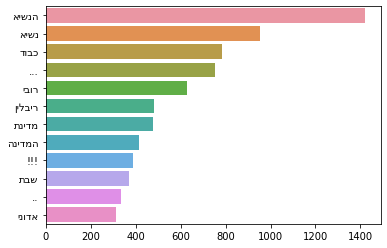

In [12]:
plot_top_non_stopwords_barchart(text, stop)

In [13]:
print(train_df[train_df.label==0].head())

                                             comment label
0  ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד...     0
1                              כל הכבוד והמון בהצלחה     0
2   תל חי , רובי . בכל העצב הזה היית קרן אור של ת...     0
3                 נקי כפיים ובר לבב בהצלחה לך ולנו .     0
4               רובי חג שמח והצלחה בבחירות לנשיאות .     0


In [14]:
print(train_df[train_df.label==1].head())

                                              comment label
8   אדוני הנשיא סליחה על הבוטות תפסיק לזיין את השכ...     1
10                   ואני עוד חשבתי שהגיע נשיא נורמלי     1
11  נשיא המדינה הלבן והמנותק חכם בדיבורים . הוא לא...     1
13   רובי ריבלין היקר !! אתה איש משפחה לא ???.. מע...     1
15           עוד לא שבוע בתפקיד וכבר שכחת מאיפה באת ?     1


In [15]:
print(train_df[train_df.label==2].head())

                                               comment label
46   חייבים לעשות סוג של חרם כשכתבים שונאי ישראל עו...     2
68   אז אתה בא ? https://www.facebook.com/events/15...     2
72    גאי אתה טיפש מטופש ילד כאפות שלא חונך על ברכי...     2
104  שמעון יפרח העלאתי בשבילך את דבריו של שמעון פרס...     2
167  רובי ריבלין הנשיא העשירי תחזית שניתנה לפני הבח...     2


# Positive top words

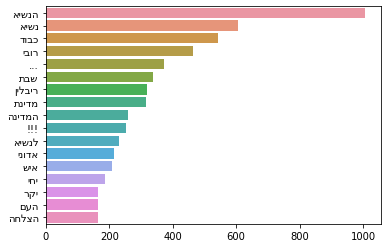

In [16]:
plot_top_non_stopwords_barchart(train_df[train_df.label==0].comment, stop)

# Negative top words

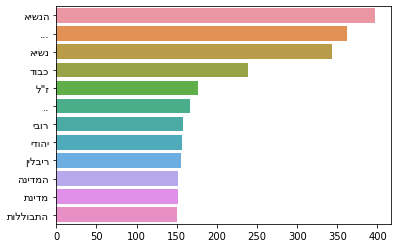

In [17]:
plot_top_non_stopwords_barchart(train_df[train_df.label==1].comment, stop)

# Neutral top words

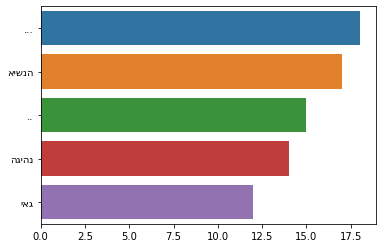

In [18]:
plot_top_non_stopwords_barchart(train_df[train_df.label==2].comment, stop)

# Data makeup
* 0 - positive comments (66%)
* 1 - negative comments (30%)
* 2 - neutral comments (3%)

80% of the data is in the train subset and 20% is in the test subset

# Let's add an identifier to the test rows

In [81]:
test_df.reset_index(inplace=True)
print(test_df.head())

   index                                               text  label
0      0   שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק...      0
1      1                             איחולי הצלחה בתפקידך .      0
2      2                                       כל הכבוד !!!      0
3      3   בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישרא...      0
4      4  איפה הגינוי ? http://www.iba.org.il/bet/bet.as...      1
